<a href="https://colab.research.google.com/github/Sahin9699/Diagnosing_Hypothyroid_disease_using_Deep_Learning/blob/main/Diagnosing_Hypothyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle # For saving models
import matplotlib.pyplot as plt # For plotting figures
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# For building our model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [55]:
# Load dataset from csv using pandas
dataset = pd.read_csv('/content/hypothyroid (2).csv')
dataset.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [56]:
# Renaming the first column as target
dataset = dataset.rename(columns = {dataset.columns[0]:"target"})

In [57]:
# Check the count of data in target
dataset["target"].value_counts()

negative       3012
hypothyroid     151
Name: target, dtype: int64

In [58]:
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

In [59]:
print("Unique categories in the column 'pregnant':", dataset['pregnant'].unique())
print("\nCount of categories in the column 'pregnant':\n", dataset["pregnant"].value_counts())

Unique categories in the column 'pregnant': ['f' 't']

Count of categories in the column 'pregnant':
 f    3100
t      63
Name: pregnant, dtype: int64


In [60]:
print("Unique categories in the column 'T3 measured'", dataset['T3_measured'].unique())

print("Count of categories in the column 'T3 measured' \n", dataset["T3_measured"].value_counts())


Unique categories in the column 'T3 measured' ['y' 'n']
Count of categories in the column 'T3 measured' 
 y    2468
n     695
Name: T3_measured, dtype: int64


In [61]:
print("Unique categories in the column 'Sex'", dataset['Sex'].unique())
print("Count of categories in the column 'Sex' \n", dataset["Sex"].value_counts())

Unique categories in the column 'Sex' ['M' 'F' '?']
Count of categories in the column 'Sex' 
 F    2182
M     908
?      73
Name: Sex, dtype: int64


In [62]:
# Replacing the categorical values into binary values
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})
# Displaying the head of the dataset
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,?
1,1,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,?
2,1,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,?
3,1,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,?
4,1,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,?


In [63]:
# Replacing ? into NaN values
dataset.replace(to_replace='?', inplace=True, value=np.NaN)

In [64]:
# Count the number of null values
dataset.isnull().sum()

target                          0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [65]:
# Dropping the TBG column as it contains extremely high number of null values
dataset.drop('TBG', axis = 1, inplace=True)

In [66]:

# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')


In [67]:
# List of columns containing null values
dataset.columns[dataset.isnull().any()].tolist()

['Age', 'Sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [68]:
# Replacing null values by mean
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['T4U'].fillna(dataset['T4U'].mean(), inplace = True)

# Replacing null values by median
dataset['TSH'].fillna(dataset['TSH'].mean(), inplace = True)
dataset['T3'].fillna(dataset['T3'].median(), inplace = True)
dataset['TT4'].fillna(dataset['TT4'].median(), inplace = True)
dataset['FTI'].fillna(dataset['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
dataset['Sex'].fillna(0, inplace = True)

In [69]:
# Features
X = dataset.drop('target', axis = 1) # selecting all columns except the target
# Target variable
y = dataset['target']

In [70]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler

# Initialization of the class
scaler = StandardScaler()

# Applying the scaler on test and train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# Input
model = Sequential()
# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', input_dim=24, activation='relu'))
# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
# Training the model
result = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/100
51/51 - 2s - loss: 0.5880 - accuracy: 0.9442 - val_loss: 0.4458 - val_accuracy: 0.9625 - 2s/epoch - 31ms/step
Epoch 2/100
51/51 - 0s - loss: 0.3054 - accuracy: 0.9541 - val_loss: 0.1793 - val_accuracy: 0.9644 - 220ms/epoch - 4ms/step
Epoch 3/100
51/51 - 0s - loss: 0.1415 - accuracy: 0.9639 - val_loss: 0.0981 - val_accuracy: 0.9723 - 178ms/epoch - 3ms/step
Epoch 4/100
51/51 - 0s - loss: 0.0940 - accuracy: 0.9689 - val_loss: 0.0710 - val_accuracy: 0.9822 - 217ms/epoch - 4ms/step
Epoch 5/100
51/51 - 0s - loss: 0.0733 - accuracy: 0.9758 - val_loss: 0.0592 - val_accuracy: 0.9842 - 183ms/epoch - 4ms/step
Epoch 6/100
51/51 - 0s - loss: 0.0629 - accuracy: 0.9792 - val_loss: 0.0527 - val_accuracy: 0.9842 - 211ms/epoch - 4ms/step
Epoch 7/100
51/51 - 0s - loss: 0.0568 - accuracy: 0.9802 - val_loss: 0.0492 - val_accuracy: 0.9822 - 205ms/epoch - 4ms/step
Epoch 8/100
51/51 - 0s - loss: 0.0535 - accuracy: 0.9812 - val_loss: 0.0470 - val_accuracy: 0.9822 - 132ms/epoch - 3ms/step
Epoch 9/10

In [75]:
# Get the loss and accuracy of the model by evaluation
loss, acc = model.evaluate(X_test, y_test)

# Print the loss and accuracy score for the model
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9826
loss: 6.83%
accuracy: 98.26%


In [76]:
# Predicting the output predictions
y_pred = model.predict(X_test).round()
# Calculating the F1 score, recall, and precision
print("%s: %.2f%%" % ("F1-score", f1_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Recall", recall_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Precision", precision_score(y_test, y_pred)*100))

20/20 [==============================] - 0s 1ms/step
F1-score: 84.06%
Recall: 78.38%
Precision: 90.62%


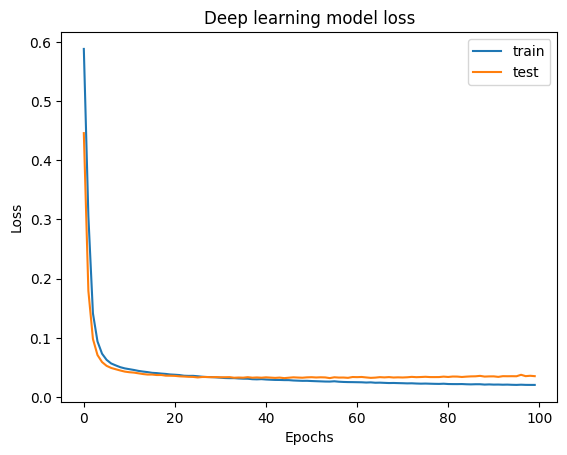

In [77]:
 # summarize the result and plot the training and test loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Set the parameters
plt.title('Deep learning model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

# Display the plots
plt.show()

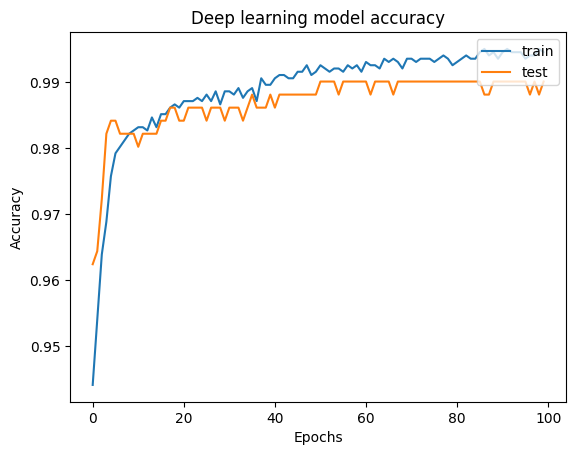

In [78]:
#summarize the result and plot the training and test accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])

# Set the parameters
plt.title('Deep learning model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

# Display the plots
plt.show()